# 2. Druga Klasteryzacja Spółek Giełdowych

## 2.1 Wczytanie danych

In [2]:
import pandas as pd
df=pd.read_excel(r'C:\Users\Andrzej\Projekt_1\DK4wsp.xlsx', sheet_name=0,
                 header=3, names=None, index_col=0, usecols="B:F")
print(df)

                                 P/B     ROA  EV/EBITDA  Current ratio
1 800 FLOWERS COM INC           2.56  0.0567      10.29         2.2794
1&1 Drillisch AG                 NaN  0.0777        NaN         2.3944
1ST SOURCE CORP                 1.67  0.0134      14.13            NaN
21st Century Fox                1.83  0.2153       8.32         4.2870
2U, Inc.                        1.44 -0.0521     -30.18         5.1072
...                              ...     ...        ...            ...
Zynerba Pharmaceuticals, Inc.   1.98 -0.4867      -2.69         9.9412
ZYNEX INC                      26.25     NaN        NaN         3.3335
ZYNGA INC                       3.31  0.0072     106.37         1.5574
NaN                             1.53     NaN        NaN            NaN
NaN                             1.10     NaN        NaN            NaN

[2569 rows x 4 columns]


## 2.2 Czyszczenie danych

In [3]:
newDf=df.dropna( axis=0, how='any')
print(newDf)
with pd.ExcelWriter('DK4wsk.xlsx') as writer: 
    newDf.to_excel(writer)

                                P/B     ROA  EV/EBITDA  Current ratio
1 800 FLOWERS COM INC          2.56  0.0567      10.29         2.2794
21st Century Fox               1.83  0.2153       8.32         4.2870
2U, Inc.                       1.44 -0.0521     -30.18         5.1072
3D SYSTEMS CORP                2.49 -0.0534     138.30         2.5572
3M                             9.59  0.1262      13.51         1.9341
...                             ...     ...        ...            ...
Zoned Properties, Inc.         0.81 -0.0157      33.63         4.4958
Zovio Inc                      0.32 -0.0121     -25.53         1.5388
Zumiez Inc                     2.11  0.0604       7.29         2.0600
Zynerba Pharmaceuticals, Inc.  1.98 -0.4867      -2.69         9.9412
ZYNGA INC                      3.31  0.0072     106.37         1.5574

[1475 rows x 4 columns]


## 2.3 Przeskalowanie cech przy wykorzystaniu mediany i rozstępu ćwiartkowego IQR

In [4]:
workDf=pd.read_excel(r'C:\Users\Andrzej\Projekt_1\DK4wsk.xlsx',
                     sheet_name=0, header=0, names=None, usecols="B:F")
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler () . fit ( workDf )
workDf=transformer.transform (workDf)
print(workDf)

[[ 0.00000000e+00  1.90981432e-01 -3.66166239e-03  3.58344114e-01]
 [-1.81818182e-01  1.59328028e+00 -1.47931161e-01  1.48754148e+00]
 [-2.78953923e-01 -7.70999116e-01 -2.96741120e+00  1.94887227e+00]
 ...
 [-1.12079701e-01  2.23695844e-01 -2.23361406e-01  2.34940098e-01]
 [-1.44458281e-01 -4.61361627e+00 -9.54229220e-01  4.66781034e+00]
 [ 1.86799502e-01 -2.46684350e-01  7.03258880e+00 -4.77529670e-02]]


In [5]:
data=workDf
workDf=pd.DataFrame({'P/B': data[:, 0], 'ROA': data[:, 1], 'EV/EBITDA': 
                     data[:, 1], 'Current ratio': data[:, 1]})
print (workDf)

           P/B       ROA  EV/EBITDA  Current ratio
0     0.000000  0.190981   0.190981       0.190981
1    -0.181818  1.593280   1.593280       1.593280
2    -0.278954 -0.770999  -0.770999      -0.770999
3    -0.017435 -0.782493  -0.782493      -0.782493
4     1.750934  0.805482   0.805482       0.805482
...        ...       ...        ...            ...
1470 -0.435866 -0.449160  -0.449160      -0.449160
1471 -0.557908 -0.417330  -0.417330      -0.417330
1472 -0.112080  0.223696   0.223696       0.223696
1473 -0.144458 -4.613616  -4.613616      -4.613616
1474  0.186800 -0.246684  -0.246684      -0.246684

[1475 rows x 4 columns]


## 2.4 Wybór parametrów oraz metody wiązania

### Wiązanie Warda

In [6]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import numpy as np
mScores=np.ones((20,4))
X=workDf.values
for k in range(1, 21):
    ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                                   compute_full_tree=True,
                                   distance_threshold=k/10).fit(workDf)
    labels=ward.labels_
    mScores[k-1][0]=k/10
    mScores[k-1][1]=metrics.calinski_harabasz_score(X, labels)
    mScores[k-1][2]=metrics.silhouette_score(X, labels)
    mScores[k-1][3]=metrics.davies_bouldin_score(X, labels)
np.set_printoptions(formatter={'float': lambda x:"{0:0.3f}".format(x)})
print(mScores)

[[0.100 125711487.459 0.287 0.245]
 [0.200 61698309.915 0.316 0.320]
 [0.300 39220427.335 0.328 0.372]
 [0.400 30588759.419 0.331 0.376]
 [0.500 25527609.831 0.335 0.391]
 [0.600 22142366.699 0.332 0.403]
 [0.700 18773276.712 0.334 0.421]
 [0.800 16668625.057 0.337 0.430]
 [0.900 15335733.894 0.339 0.436]
 [1.000 13782559.951 0.332 0.451]
 [1.100 12997436.945 0.330 0.442]
 [1.200 11938245.520 0.325 0.460]
 [1.300 11254875.326 0.321 0.447]
 [1.400 10641204.690 0.316 0.454]
 [1.500 10030083.529 0.311 0.444]
 [1.600 9387139.193 0.308 0.431]
 [1.700 9030183.884 0.303 0.434]
 [1.800 8901035.646 0.304 0.429]
 [1.900 8299914.240 0.295 0.422]
 [2.000 7943041.280 0.298 0.439]]


In [7]:
dfScores=pd.DataFrame({'D.T.': mScores[8:9, 0], 'C-H s': mScores[8:9, 1], 
                       'K-R s':mScores[8:9, 2], 'D-B s': mScores[8:9, 3]})
print(dfScores)

   D.T.         C-H s     K-R s     D-B s
0   0.9  1.533573e+07  0.339441  0.435578


### Wiązanie Warda dendrogram

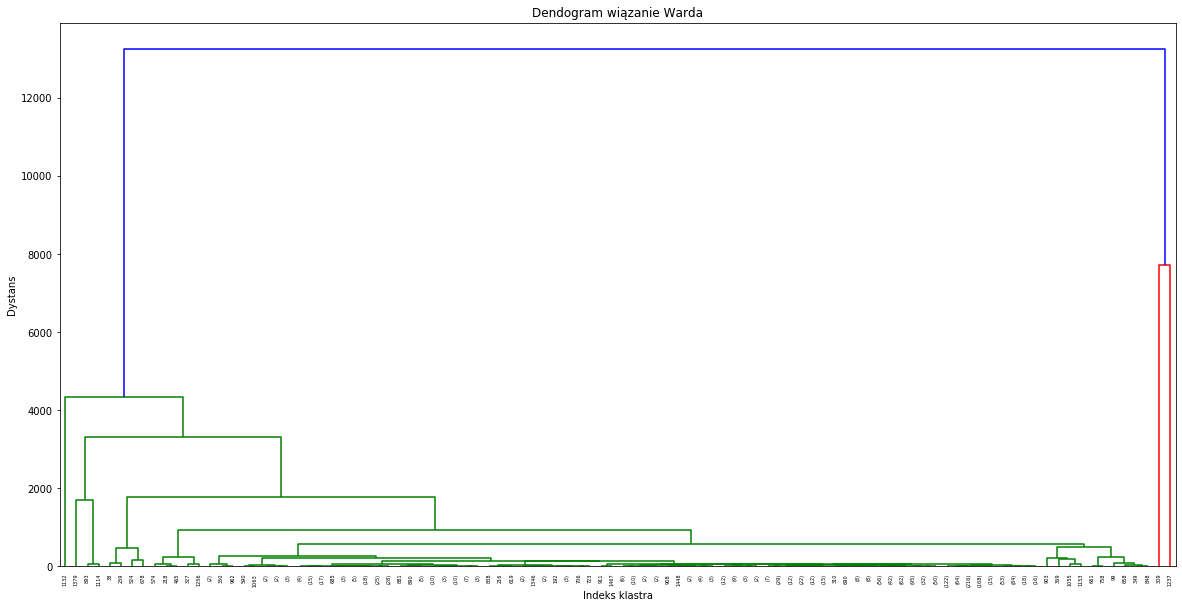

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(workDf, 'ward')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', p=100,truncate_mode='lastp')
plt.xlabel('Indeks klastra') 
plt.ylabel('Dystans')
plt.title('Dendogram wiązanie Warda') 
plt.show()

### Wiązanie Warda wizualizacja

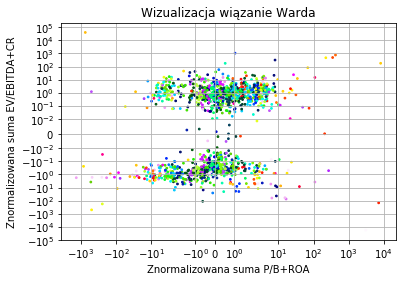

In [10]:
ward = AgglomerativeClustering(n_clusters=None, linkage='ward',
                                compute_full_tree=True,
                                distance_threshold=0.9).fit(workDf)
plt.scatter( data[:, 0]+ data[:, 1], data[:, 2]+ data[:, 3], c=ward.labels_, 
            cmap='gist_ncar',s=3)
plt.grid()
plt.yscale('symlog', linthreshy=0.01)
plt.xscale('symlog', linthreshy=0.01)
plt.xlabel('Znormalizowana suma P/B+ROA')
plt.ylabel('Znormalizowana suma EV/EBITDA+CR')
plt.title('Wizualizacja wiązanie Warda') 
plt.show()

### Średnie wiązanie

In [10]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import numpy as np
mScores=np.ones((20,4))
X=workDf.values
for k in range(1, 21):
    hca = AgglomerativeClustering(n_clusters=None, linkage='average',
                                   compute_full_tree=True,
                                   distance_threshold=k/10).fit(workDf)
    labels=hca.labels_
    mScores[k-1][0]=k/10
    mScores[k-1][1]=metrics.calinski_harabasz_score(X, labels)
    mScores[k-1][2]=metrics.silhouette_score(X, labels)
    mScores[k-1][3]=metrics.davies_bouldin_score(X, labels)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(mScores)

[[0.100 78595464.271 0.275 0.225]
 [0.200 31161157.846 0.296 0.264]
 [0.300 15881229.850 0.287 0.281]
 [0.400 10507001.540 0.290 0.284]
 [0.500 8120338.977 0.294 0.295]
 [0.600 6353109.287 0.289 0.314]
 [0.700 4541890.483 0.262 0.300]
 [0.800 4085554.215 0.293 0.314]
 [0.900 3927890.798 0.309 0.319]
 [1.000 3820397.674 0.324 0.310]
 [1.100 2718275.872 0.298 0.303]
 [1.200 2723715.566 0.315 0.309]
 [1.300 2624143.437 0.348 0.297]
 [1.400 2666086.132 0.349 0.298]
 [1.500 2440970.160 0.364 0.292]
 [1.600 2155732.583 0.365 0.264]
 [1.700 1943691.895 0.372 0.255]
 [1.800 1954944.155 0.372 0.254]
 [1.900 1990125.008 0.373 0.252]
 [2.000 1464941.518 0.367 0.260]]


In [11]:
dfScores=pd.DataFrame({'D.T.': mScores[16:17, 0], 'C-H s': mScores[16:17, 1], 
                       'K-R s':mScores[16:17, 2], 'D-B s': mScores[16:17, 3]})
print(dfScores)

   D.T.         C-H s     K-R s     D-B s
0   1.7  1.943692e+06  0.371509  0.254919


### Średnie wiązanie dendrogram

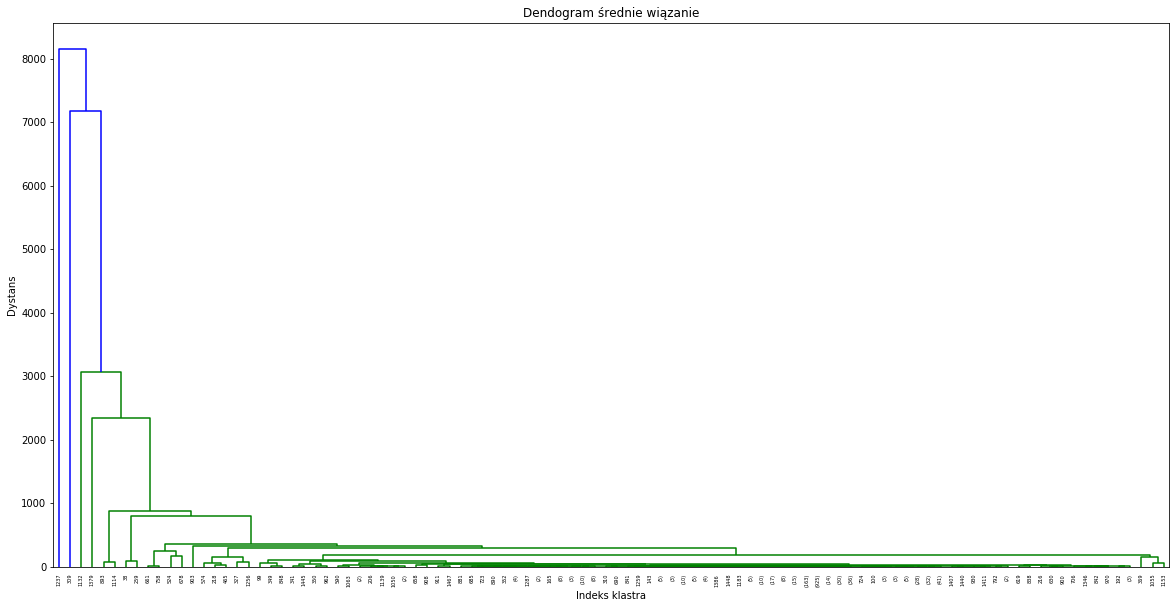

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(workDf, 'average')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', p=100,truncate_mode='lastp')
plt.xlabel('Indeks klastra') 
plt.ylabel('Dystans')
plt.title('Dendogram średnie wiązanie') 
plt.show()

### Średnie wiązanie wizualizacja

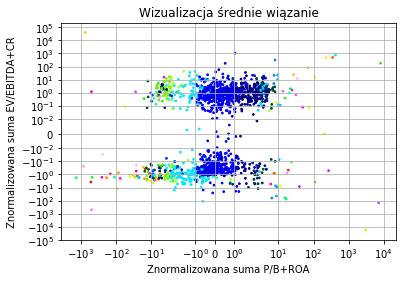

In [12]:
hca = AgglomerativeClustering(n_clusters=None, linkage='average',
                                compute_full_tree=True,
                                distance_threshold=1.7).fit(workDf)
plt.scatter( data[:, 0]+ data[:, 1], data[:, 2]+ data[:, 3], c=hca.labels_, 
            cmap='gist_ncar',s=3)
plt.grid()
plt.yscale('symlog', linthreshy=0.01)
plt.xscale('symlog', linthreshy=0.01)
plt.xlabel('Znormalizowana suma P/B+ROA')
plt.ylabel('Znormalizowana suma EV/EBITDA+CR')
plt.title('Wizualizacja średnie wiązanie') 
plt.show()

### Pełne wiązanie 

In [14]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import numpy as np
mScores=np.ones((20,4))
X=workDf.values
for k in range(1, 21):
    hca = AgglomerativeClustering(n_clusters=None, linkage='complete',
                                   compute_full_tree=True,
                                   distance_threshold=k/10).fit(workDf)
    labels=hca.labels_
    mScores[k-1][0]=k/10
    mScores[k-1][1]=metrics.calinski_harabasz_score(X, labels)
    mScores[k-1][2]=metrics.silhouette_score(X, labels)
    mScores[k-1][3]=metrics.davies_bouldin_score(X, labels)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(mScores)

[[0.100 115480345.207 0.276 0.245]
 [0.200 49880260.993 0.290 0.317]
 [0.300 30780116.575 0.301 0.347]
 [0.400 23447385.268 0.307 0.361]
 [0.500 17452689.831 0.299 0.369]
 [0.600 14179927.027 0.293 0.385]
 [0.700 12418915.133 0.292 0.390]
 [0.800 10140941.657 0.288 0.404]
 [0.900 8953365.642 0.286 0.403]
 [1.000 8180724.462 0.288 0.399]
 [1.100 7590291.706 0.299 0.397]
 [1.200 6920525.747 0.291 0.399]
 [1.300 6599679.849 0.286 0.401]
 [1.400 6170174.946 0.297 0.399]
 [1.500 5123687.895 0.286 0.395]
 [1.600 5096207.847 0.290 0.396]
 [1.700 4581111.058 0.284 0.394]
 [1.800 4466916.678 0.288 0.380]
 [1.900 4405331.312 0.287 0.382]
 [2.000 4415308.290 0.288 0.400]]


In [15]:
dfScores=pd.DataFrame({'D.T.': mScores[13:14, 0], 'C-H s': mScores[13:14, 1], 
                       'K-R s':mScores[13:14, 2], 'D-B s': mScores[13:14, 3]})
print(dfScores)

   D.T.         C-H s    K-R s     D-B s
0   1.4  6.170175e+06  0.29658  0.398872


### Pełne wiązanie dendrogram

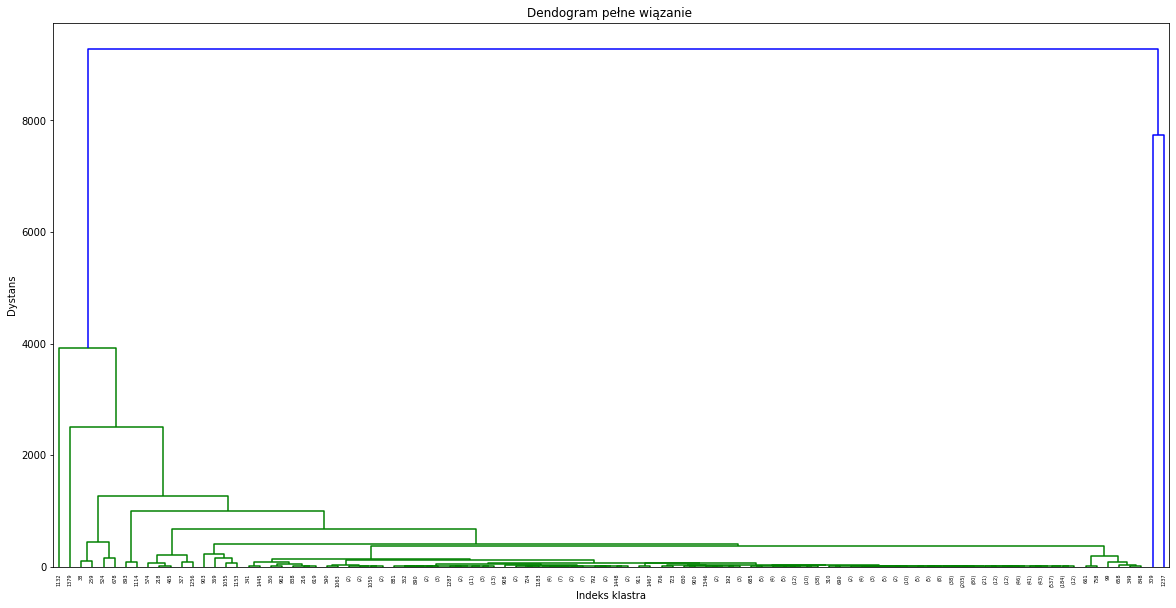

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(workDf, 'complete')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', p=100,truncate_mode='lastp')
plt.xlabel('Indeks klastra') 
plt.ylabel('Dystans')
plt.title('Dendogram pełne wiązanie ') 
plt.show()

### Pełne wiązanie wizualizacja

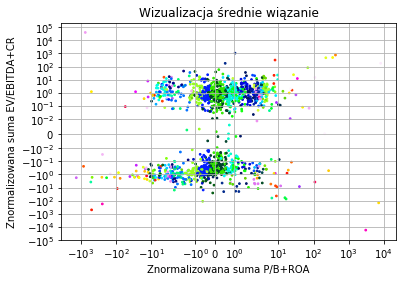

In [14]:
hca = AgglomerativeClustering(n_clusters=None, linkage='complete',
                                compute_full_tree=True,
                                distance_threshold=1.4).fit(workDf)
plt.scatter( data[:, 0]+ data[:, 1], data[:, 2]+ data[:, 3], c=hca.labels_, 
            cmap='gist_ncar',s=3)
plt.grid()
plt.yscale('symlog', linthreshy=0.01)
plt.xscale('symlog', linthreshy=0.01)
plt.xlabel('Znormalizowana suma P/B+ROA')
plt.ylabel('Znormalizowana suma EV/EBITDA+CR')
plt.title('Wizualizacja średnie wiązanie') 
plt.show()

### Pojedyncze wiązanie 

In [18]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import numpy as np
mScores=np.ones((20,4))
X=workDf.values
for k in range(1, 21):
    hca = AgglomerativeClustering(n_clusters=None, linkage='single',
                                   compute_full_tree=True,
                                   distance_threshold=k/10).fit(workDf)
    labels=hca.labels_
    mScores[k-1][0]=k/10
    mScores[k-1][1]=metrics.calinski_harabasz_score(X, labels)
    mScores[k-1][2]=metrics.silhouette_score(X, labels)
    mScores[k-1][3]=metrics.davies_bouldin_score(X, labels)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(mScores)

[[0.100 665725.947 -0.153 0.215]
 [0.200 334451.609 -0.139 0.213]
 [0.300 299046.330 -0.148 0.231]
 [0.400 289228.884 -0.099 0.213]
 [0.500 166742.236 -0.083 0.206]
 [0.600 178045.448 -0.049 0.198]
 [0.700 198674.088 -0.025 0.201]
 [0.800 199906.967 0.195 0.183]
 [0.900 212444.728 0.217 0.168]
 [1.000 227456.418 0.321 0.168]
 [1.100 231000.039 0.380 0.156]
 [1.200 176036.987 0.364 0.141]
 [1.300 166417.716 0.369 0.125]
 [1.400 146067.865 0.346 0.115]
 [1.500 149276.978 0.348 0.111]
 [1.600 153046.136 0.377 0.103]
 [1.700 156957.163 0.386 0.100]
 [1.800 159195.870 0.386 0.100]
 [1.900 159195.870 0.386 0.100]
 [2.000 164622.031 0.396 0.107]]


### Pojedyncze wiązanie dendrogram

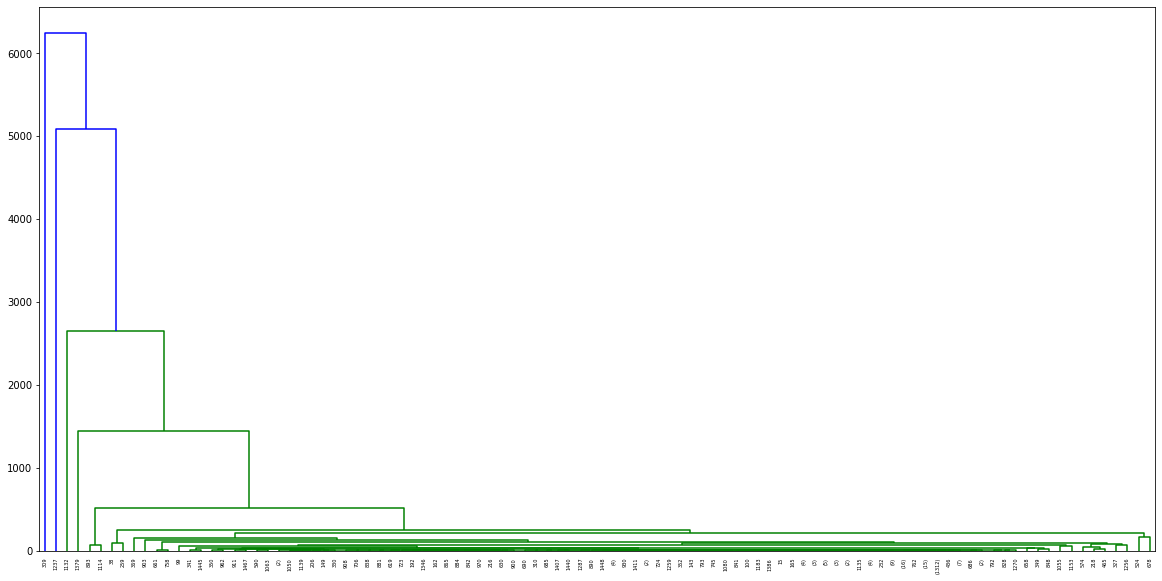

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(workDf, 'single')
plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top', p=100,truncate_mode='lastp')
plt.xlabel('Indeks klastra') 
plt.ylabel('Dystans')
plt.title('Dendogram pojedyncze wiązanie') 
plt.show()

## 2.5 Wynik

### Wizualizacja

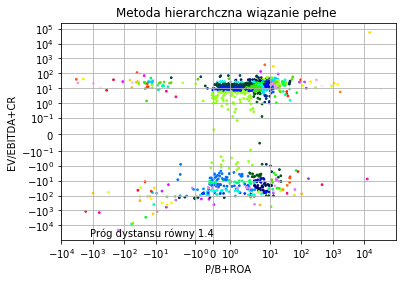

In [15]:
hca = AgglomerativeClustering(n_clusters=None, linkage='complete',
                                   compute_full_tree=True,
                                   distance_threshold=1.4).fit(workDf)
data=transformer.inverse_transform(workDf)
plt.scatter( data[:, 0]+ data[:, 1], data[:, 2]+ data[:, 3], c=hca.labels_, 
            cmap='gist_ncar',s=3)
plt.grid()
plt.yscale('symlog', linthreshy=0.1)
plt.xscale('symlog', linthreshy=0.1)
plt.xlabel('P/B+ROA')
plt.ylabel('EV/EBITDA+CR')
plt.title('Metoda hierarchczna wiązanie pełne ')
plt.annotate('Próg dystansu równy 1.4', xy=(2, 1), xytext=(-1200, -55000))
plt.show()

### Rezultat i zapis do Excela

In [22]:
df=newDf
df['Clust']=hca.labels_
df=df.sort_values(by='Clust')
with pd.ExcelWriter('resultDK4wsk.xlsx') as writer: 
    df.to_excel(writer)
print(df)

                                              P/B     ROA  EV/EBITDA  \
MaxPoint Interactive, Inc.                   3.47 -0.2152     -31.80   
CRAY INC                                     5.19 -0.2883     -13.63   
ChemoCentryx, Inc.                           5.86 -0.2122      -5.50   
SolarWindow Technologies, Inc.               6.11 -0.2456     -30.93   
Sarepta Therapeutics, Inc.                   4.32 -0.2053     -14.55   
...                                           ...     ...        ...   
American Airlines Group Inc.              -583.85  0.0243       6.65   
COCA-COLA REFRESHMENTS USA, INC.           441.74  0.0503     214.44   
STARWOOD HOTEL & RESORTS WORLDWIDE, INC  32746.96  0.0117    2453.52   
BOEING CO                                  833.97  0.0843      14.73   
Ubiquiti Networks, Inc.                     79.58  0.3684      18.53   

                                         Current ratio  Clust  
MaxPoint Interactive, Inc.                      1.1998      0  
CRAY IN